# K-Means Cluster
## Applying K-Means to the Ancient Authors Dataset from Brill’s New Pauly

https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans, DBSCAN # clustering algorithms
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.neighbors import NearestNeighbors # for selecting the optimal eps value when using DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer

## Load data
- 저자의 중요도를 평가하는 척도로 사용되는 DNP 항목의 단어 수( word_count)
- 현대 번역의 수 ( modern_translations)
- 알려진 작품 수( known_works)
- 기존 원고 수( manuscripts)
- 초판 수( early_editions)
- 초기 번역 수( early_translations)
- 최신판 수( modern_editions)
- 해설 수( commentaries)

In [3]:
data = pd.read_csv('./data/DNP_ancient_authors.csv', index_col="authors").drop(columns=["Unnamed: 0"])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Achilles Tatius of Alexandria to Zosimus
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   word_count           238 non-null    int64
 1   modern_translations  238 non-null    int64
 2   known_works          238 non-null    int64
 3   manuscripts          238 non-null    int64
 4   early_editions       238 non-null    int64
 5   early_translations   238 non-null    int64
 6   modern_editions      238 non-null    int64
 7   commentaries         238 non-null    int64
dtypes: int64(8)
memory usage: 16.7+ KB


In [5]:
data

,word_count,modern_translations,known_works,manuscripts,early_editions,early_translations,modern_editions,commentaries
authors,,,,,,,,
Achilles Tatius of Alexandria,383,5,1,2,3,9,2,1
Aelianus Tacticus,350,1,1,0,3,6,1,0
"Aelianus, Claudius (Aelian)",746,8,3,6,10,8,7,0
Aelius Aristides (Publius Aelius Aristides),2180,26,22,7,11,6,15,1
Aeneas Tacticus,304,5,1,1,1,2,6,0
...,...,...,...,...,...,...,...,...
"Vergilius Maro, Publius (Virgil)",1894,16,3,7,12,15,16,31
Vitruvius,2537,14,1,16,15,34,6,4
Xenophon of Athens,708,23,5,3,4,0,14,3


In [6]:
data.describe()

,word_count,modern_translations,known_works,manuscripts,early_editions,early_translations,modern_editions,commentaries
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,904.441176,12.970588,4.735294,4.512605,5.823529,4.794118,10.399160,3.815126
std,804.388666,16.553047,6.784297,4.637702,4.250881,6.681706,11.652326,7.013509
min,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,448.750000,4.250000,1.000000,1.000000,3.000000,0.000000,4.000000,0.000000
50%,704.000000,9.000000,2.000000,3.000000,5.000000,2.500000,7.000000,1.000000
75%,1151.500000,15.750000,6.000000,6.000000,8.000000,8.000000,14.000000,4.000000
max,9406.000000,178.000000,65.000000,34.000000,28.000000,39.000000,115.000000,43.000000


 ##### 'word_cout'는 다른 열과 비교해 평균과 표준편차 값이 크다 -> scaling
 ##### 'word_count'에서 75%값고 max값을 비교했을 때 차이가 매우 크다 -> noise -> outlier 제거

## remove outlier

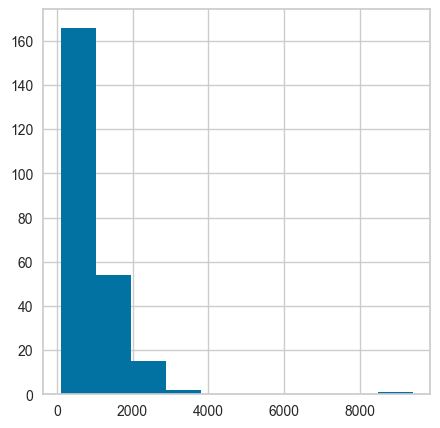

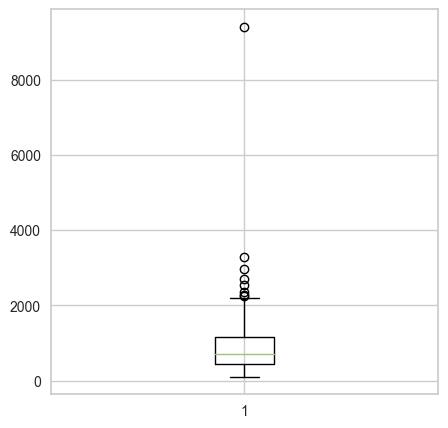

In [7]:
# visualize outlier
plt.figure(figsize=(5,5))
plt.hist(data['word_count'])
plt.show()

plt.figure(figsize=(5,5))
plt.boxplot(data['word_count'])
plt.show()

^ max값이 outlier임을 확인 할 수 있다.

In [8]:
# remove outlier
ninety_per = data['word_count'].quantile(0.9)      #데이터의 90%값 출력
data = data[data['word_count'] <= ninety_per]      #90%보다 작은 값만 저장 -> outlier 제거

#행 전체 삭제

In [9]:
data

,word_count,modern_translations,known_works,manuscripts,early_editions,early_translations,modern_editions,commentaries
authors,,,,,,,,
Achilles Tatius of Alexandria,383,5,1,2,3,9,2,1
Aelianus Tacticus,350,1,1,0,3,6,1,0
"Aelianus, Claudius (Aelian)",746,8,3,6,10,8,7,0
Aeneas Tacticus,304,5,1,1,1,2,6,0
Aeschylus of Athens,1758,31,7,5,10,14,15,20
...,...,...,...,...,...,...,...,...
"Venantius Fortunatus, Honorius Clementianus",503,9,4,4,2,0,3,0
Vergiliana Appendix,654,12,9,0,4,0,14,9
Xenophon of Athens,708,23,5,3,4,0,14,3


## Scaling

In [10]:
from sklearn.preprocessing import StandardScaler# as SS # z-score standardization 

ss = StandardScaler()
data_scaled = ss.fit_transform(data)
data_scaled= pd.DataFrame(data_scaled,
                         columns=["word_count", "modern_translations", "known_works", "manuscripts", "early_editions", "early_translations", "modern_editions", "commentaries"])
data_scaled = data_scaled.set_index(data.index)

In [11]:
data_scaled

,word_count,modern_translations,known_works,manuscripts,early_editions,early_translations,modern_editions,commentaries
authors,,,,,,,,
Achilles Tatius of Alexandria,-0.876606,-0.582069,-0.624805,-0.475009,-0.647251,1.063611,-0.938055,-0.354220
Aelianus Tacticus,-0.961087,-1.025748,-0.624805,-0.984543,-0.647251,0.449548,-1.083206,-0.539105
"Aelianus, Claudius (Aelian)",0.052684,-0.249310,-0.142104,0.544058,1.393975,0.858923,-0.212300,-0.539105
Aeneas Tacticus,-1.078848,-0.582069,-0.624805,-0.729776,-1.230459,-0.369203,-0.357451,-0.539105
Aeschylus of Athens,2.643432,2.301843,0.823299,0.289291,1.393975,2.087049,0.948907,3.158605
...,...,...,...,...,...,...,...,...
"Venantius Fortunatus, Honorius Clementianus",-0.569403,-0.138390,0.099247,0.034524,-0.938855,-0.778578,-0.792904,-0.539105
Vergiliana Appendix,-0.182839,0.194369,1.306000,-0.984543,-0.355648,-0.778578,0.803756,1.124864
Xenophon of Athens,-0.044597,1.414485,0.340598,-0.220242,-0.355648,-0.778578,0.803756,0.015551


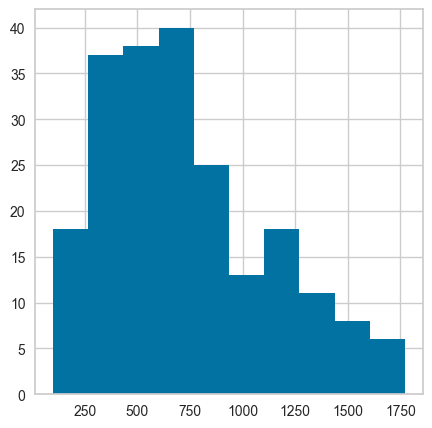

In [12]:
#check
plt.figure(figsize=(5,5))
plt.hist(data['word_count'])
plt.show()

## Figure Selection :Silhouette score

### Silhouette
: 군집 내 응집력과 군집 간 분리도를 종합적으로 평가

각 데이터 포인트의 실루엣 계수 계산 -> 평균 계수

0에 가까울 수록 응집력이 강

In [13]:
from sklearn.metrics import silhouette_score # used as a metric to evaluate the cohesion in a cluster

def FeatureSelection(df,n_clusters =3, max_features=4):

    feature_list = list(df.columns)
    selected_features = list()
    # select starting feature
    initial_feature = ""
    high_score = 0
    for feature in feature_list:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        data_ = df[feature]
        labels = kmeans.fit_predict(data_.to_frame())
        score_ = silhouette_score(data_.to_frame(), labels)
        print("Proposed new feature {} with score {}". format(feature, score_))
        if score_ >= high_score:
            initial_feature = feature
            high_score = score_
    print("The initial feature is {} with a silhouette score of {}.".format(initial_feature, high_score))
    feature_list.remove(initial_feature)
    selected_features.append(initial_feature)
    for _ in range(max_features-1):
        high_score = 0
        selected_feature = ""
        print("Starting selection {}...".format(_))
        for feature in feature_list:
            selection_ = selected_features.copy()
            selection_.append(feature)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            data_ = df[selection_]
            labels = kmeans.fit_predict(data_)
            score_ = silhouette_score(data_, labels)
            print("Proposed new feature {} with score {}". format(feature, score_))
            if score_ > high_score:
                selected_feature = feature
                high_score = score_
        selected_features.append(selected_feature)
        feature_list.remove(selected_feature)
        print("Selected new feature {} with score {}". format(selected_feature, high_score))
    return selected_features

In [14]:
selected_features = FeatureSelection(data_scaled, max_features=3, n_clusters=3)

Proposed new feature word_count with score 0.5815823896749474
Proposed new feature modern_translations with score 0.592449382653205
Proposed new feature known_works with score 0.7606223362466435
Proposed new feature manuscripts with score 0.6193716240205519
Proposed new feature early_editions with score 0.6054575587243932
Proposed new feature early_translations with score 0.7025924996773049
Proposed new feature modern_editions with score 0.6267499859538754
Proposed new feature commentaries with score 0.7635590362947628
The initial feature is commentaries with a silhouette score of 0.7635590362947628.
Starting selection 0...
Proposed new feature word_count with score 0.4982357331583712
Proposed new feature modern_translations with score 0.4870986176486183
Proposed new feature known_works with score 0.6248907485707674
Proposed new feature manuscripts with score 0.49904671012606855
Proposed new feature early_editions with score 0.48622842876757727
Proposed new feature early_translations w

In [15]:
selected_features

['commentaries', 'known_works', 'modern_editions']

In [16]:
#선택된 feature으로 df
df= data_scaled[selected_features]
print(df)

                                             commentaries  known_works  \
authors                                                                  
Achilles Tatius of Alexandria                   -0.354220    -0.624805   
Aelianus Tacticus                               -0.539105    -0.624805   
Aelianus, Claudius (Aelian)                     -0.539105    -0.142104   
Aeneas Tacticus                                 -0.539105    -0.624805   
Aeschylus of Athens                              3.158605     0.823299   
...                                                   ...          ...   
Venantius Fortunatus, Honorius Clementianus     -0.539105     0.099247   
Vergiliana Appendix                              1.124864     1.306000   
Xenophon of Athens                               0.015551     0.340598   
Xenophon of Ephesus                             -0.539105    -0.624805   
Zosimus                                         -0.354220    -0.624805   

                                     

### Elbow plot
: 군집수에 따른 응집도 변화 확인. 군집 수와 응집도 반비례.


C:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


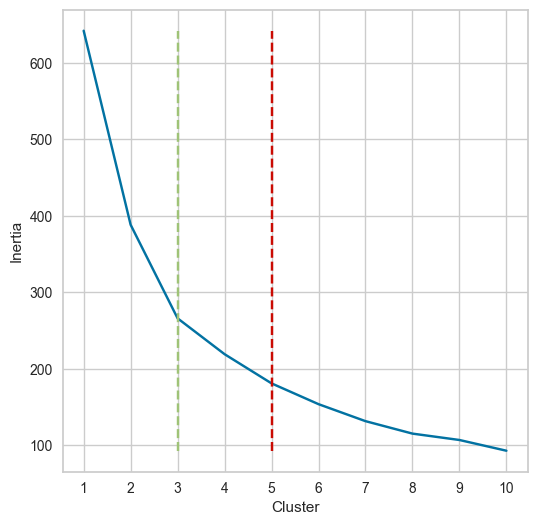

In [17]:
inertia_list = []
for n in range(1,11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

# plotting
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.lineplot(y=inertia_list, x=range(1,11), ax=ax)
ax.set_xlabel("Cluster")
ax.set_ylabel("Inertia")
ax.set_xticks(list(range(1,11)))
ax.vlines(3,ymin=min(inertia_list), ymax=max(inertia_list), linestyle='--',color='g')
ax.vlines(5,ymin=min(inertia_list), ymax=max(inertia_list), linestyle='--',color='r')
fig.show()
fig.savefig("elbow_plot.png")

군집의 수가 늘어날수록 응집력이 떨어지는 것을 알 수 있다

inertia가 급격히 떨어지는 n=3 및 n=5 클러스터에서 "엘보우"를 찾을 수 있다

## Silhouette plot

C:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


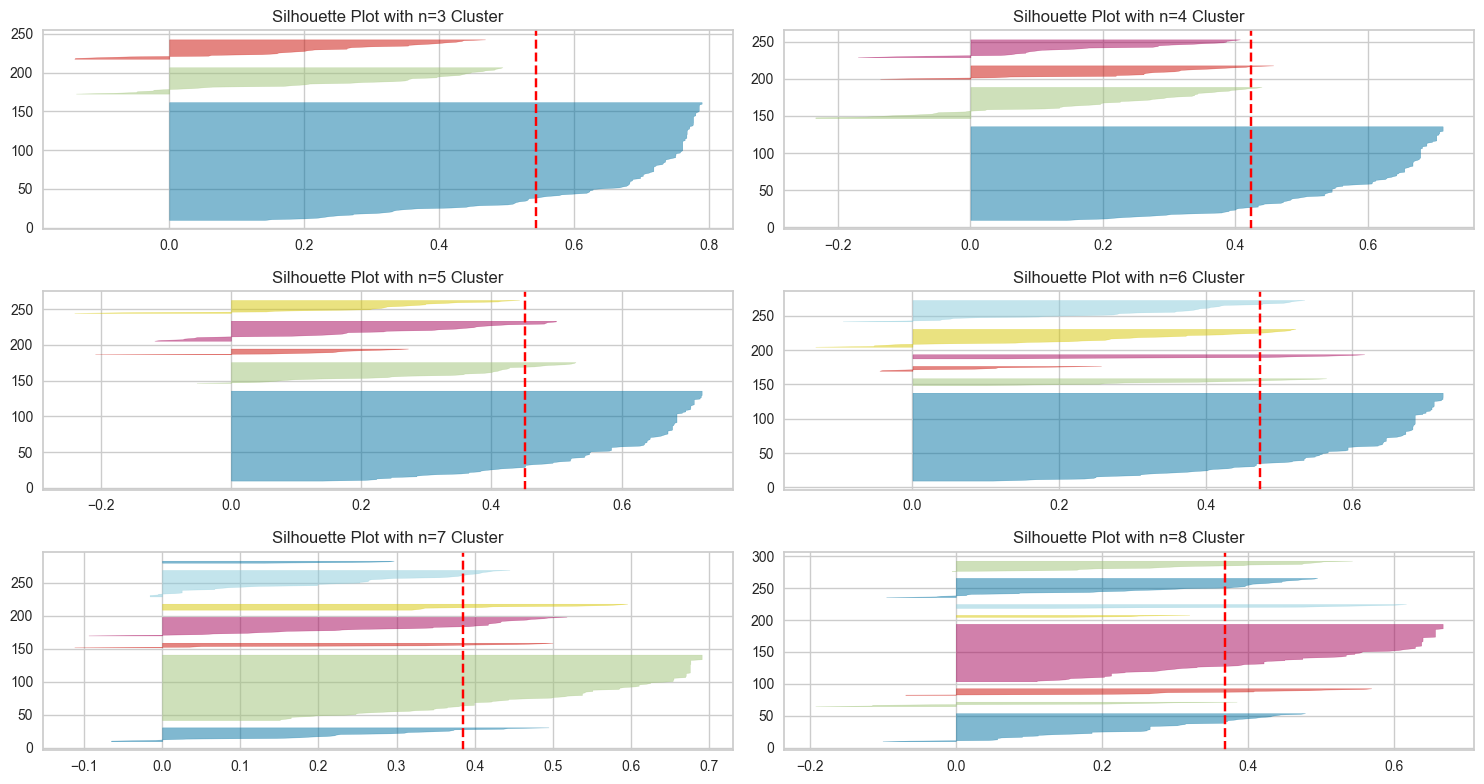

In [18]:
range_ = range(3,9)

half_length = int(len(range_)/2)
range_list = list(range_)
fig, ax = plt.subplots(half_length, 2, figsize=(15,8))
for _ in range_:
    kmeans = KMeans(n_clusters=_, random_state=42)
    q, mod = divmod(_ - range_list[0], 2)
    sv = SilhouetteVisualizer(kmeans, colors="yellowbrick", ax=ax[q][mod])
    ax[q][mod].set_title("Silhouette Plot with n={} Cluster".format(_))
    sv.fit(df)
fig.tight_layout()
fig.show()
fig.savefig("silhouette_plot.png")

 n=3 또는 n=5를 선택하는 것이 올바른 클러스터 선택
 
 n=3 클러스터의 평균 실루엣 점수보다 훨씬 낮기 때문에 n=5 클러스터를 사용하여 k 평균으로 데이터 세트를 분석하기로 결정

## K-means

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(df)
df["clusters"] = cluster_labels

C:\ProgramData\Anaconda3\envs\summer\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
df

,commentaries,known_works,modern_editions,clusters
authors,,,,
Achilles Tatius of Alexandria,-0.354220,-0.624805,-0.938055,0
Aelianus Tacticus,-0.539105,-0.624805,-1.083206,0
"Aelianus, Claudius (Aelian)",-0.539105,-0.142104,-0.212300,0
Aeneas Tacticus,-0.539105,-0.624805,-0.357451,0
Aeschylus of Athens,3.158605,0.823299,0.948907,2
...,...,...,...,...
"Venantius Fortunatus, Honorius Clementianus",-0.539105,0.099247,-0.792904,0
Vergiliana Appendix,1.124864,1.306000,0.803756,3
Xenophon of Athens,0.015551,0.340598,0.803756,1


## PCA : reduce dimension

<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

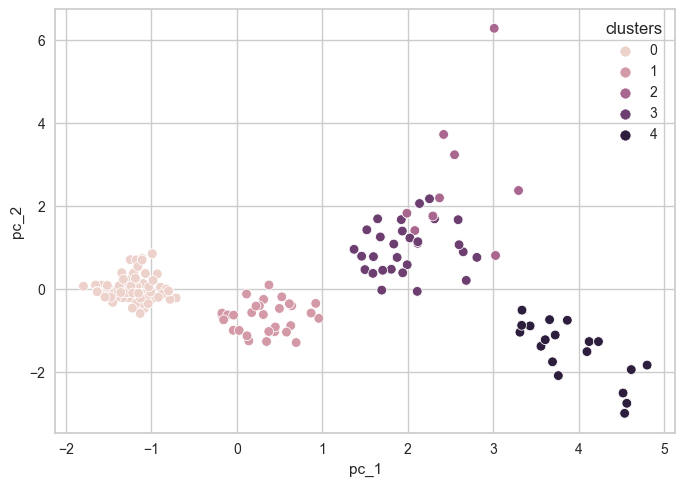

In [21]:
pca = PCA(n_components=2, whiten=False, random_state=42)
author_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(data=author_pca, columns=["pc_1", "pc_2"])
df_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=df_pca)

In [22]:
df_pca

,pc_1,pc_2,clusters
0,-1.514660,0.078953,0
1,-1.633590,-0.072529,0
2,-1.036557,-0.358877,0
3,-1.287782,-0.097219,0
4,2.370543,2.187308,2
...,...,...,...
209,-1.222171,-0.467485,0
210,2.683152,0.200280,3
211,0.526099,-0.195536,1
212,-1.356944,-0.092281,0
